In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats


In [10]:
data = pd.read_csv('heart_data.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1.0,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0.0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1.0,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1.0,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1.0,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1.0,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0.0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0.0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0.0,159,0,0.0,2,0,2,1


In [11]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     1
thalach     0
exang       0
oldpeak     2
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
data["restecg"].fillna(data["restecg"].median(), inplace=True)
data["oldpeak"].fillna(data["oldpeak"].median(), inplace=True)


C:\Users\SMART\AppData\Local\Temp\ipykernel_23180\983960953.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["restecg"].fillna(data["restecg"].median(), inplace=True)
C:\Users\SMART\AppData\Local\Temp\ipykernel_23180\983960953.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [13]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
print(data.duplicated().sum())

721


In [15]:
data.drop_duplicates(inplace=True)

In [16]:
print(data.duplicated().sum())

0


In [24]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1.0,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0.0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1.0,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1.0,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1.0,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,44,0,2,108,141,0,1.0,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1.0,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0.0,125,0,0.0,2,0,2,0
873,57,1,0,140,192,0,1.0,148,0,0.4,1,0,1,1


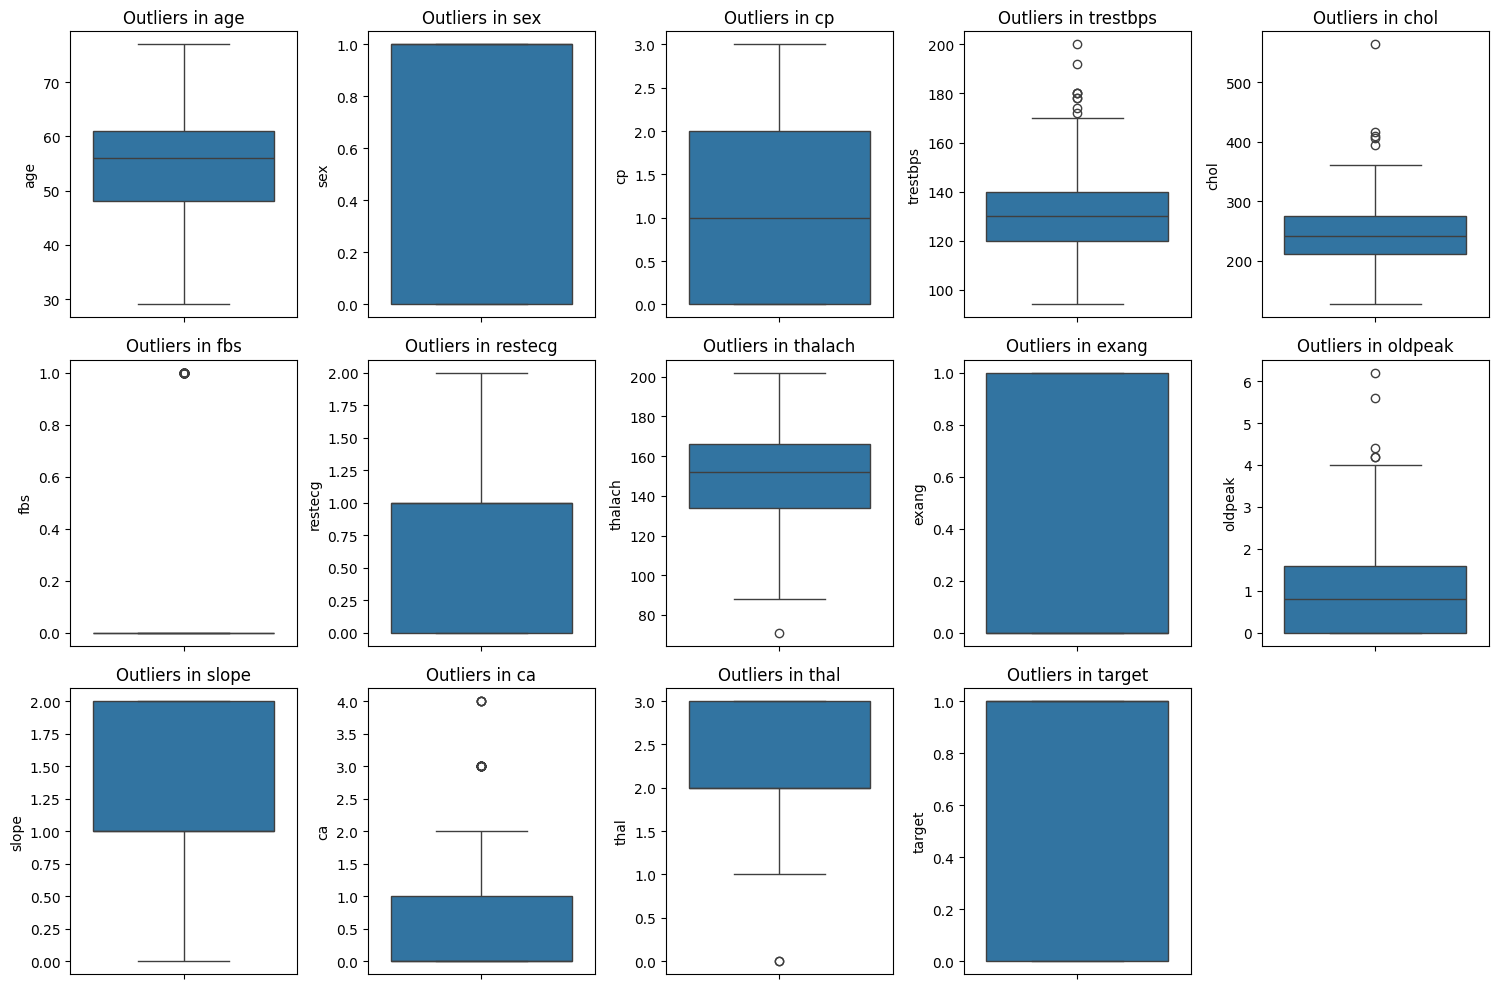

In [21]:
# Outliers
numeric_cols = data.select_dtypes(include=['number']).columns 
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Outliers in {col}')
plt.tight_layout()
plt.show()

In [70]:

#calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['trestbps'].quantile(0.25)
Q3 = data['trestbps'].quantile(0.75)
#calculate the IQR
IQR1 = Q3 - Q1
#calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR1
upper_bound = Q3 + 1.5 * IQR1
#Identify outliers
outliers = data[(data['trestbps'] < lower_bound) | (data['trestbps'] > upper_bound)]
outliers



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
29,55,0,0,180,327,0,2.0,117,1,3.4,1,0,2,0
47,66,0,0,178,228,1,1.0,165,1,1.0,1,2,3,0
87,59,0,0,174,249,0,1.0,143,1,0.0,1,0,2,0
137,64,0,0,180,325,0,1.0,154,1,0.0,2,0,2,1
151,54,1,1,192,283,0,0.0,195,0,0.0,2,1,3,0
175,56,0,0,200,288,1,0.0,133,1,4.0,0,2,3,0
343,52,1,2,172,199,1,1.0,162,0,0.5,2,0,3,1
396,68,1,2,180,274,1,0.0,150,1,1.6,1,0,3,0
528,59,1,3,178,270,0,0.0,145,0,4.2,0,0,3,1


In [71]:
outliers =  data[~((data['trestbps'] < lower_bound) | (data['trestbps'] > upper_bound))]
outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1.0,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0.0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1.0,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1.0,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1.0,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,44,0,2,108,141,0,1.0,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1.0,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0.0,125,0,0.0,2,0,2,0
873,57,1,0,140,192,0,1.0,148,0,0.4,1,0,1,1


{'whiskers': [<matplotlib.lines.Line2D at 0x1e61b7a6470>,
 'caps': [<matplotlib.lines.Line2D at 0x1e61b7a7640>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e61bdefb50>],
 'medians': [<matplotlib.lines.Line2D at 0x1e61b7a7c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e61b7a7f40>],
 'means': []}

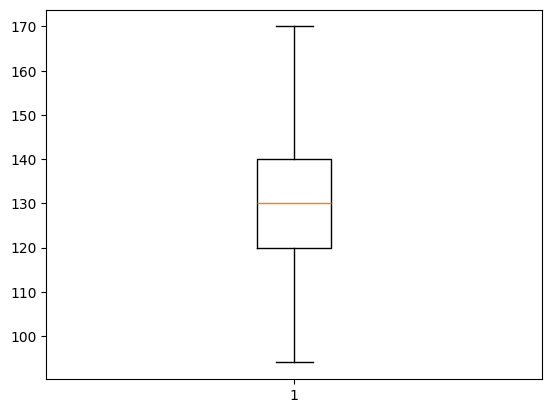

In [72]:
plt.boxplot(outliers['trestbps'])

In [73]:

#calculate Q1 (25th percentile) and Q3 (75th percentile)
Q5 = data['chol'].quantile(0.25)
Q7 = data['chol'].quantile(0.75)
#calculate the IQR
IQR2 = Q7 - Q5
#calculate lower and upper bounds for outliers
lower_bound = Q5 - 1.5 * IQR2
upper_bound = Q7 + 1.5 * IQR2
#Identify outliers
outliers = data[(data['chol'] < lower_bound) | (data['chol'] > upper_bound)]
outliers



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
123,65,0,2,140,417,1,0.0,157,0,0.8,2,1,2,1
158,67,0,2,115,564,0,0.0,160,0,1.6,1,0,3,1
179,56,0,0,134,409,0,0.0,150,1,1.9,1,2,3,0
255,62,0,0,140,394,0,0.0,157,0,1.2,1,0,2,1
450,63,0,0,150,407,0,0.0,154,0,4.0,1,3,3,0


In [74]:
outliers =  data[~((data['chol'] < lower_bound) | (data['chol'] > upper_bound))]
outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1.0,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0.0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1.0,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1.0,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1.0,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,44,0,2,108,141,0,1.0,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1.0,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0.0,125,0,0.0,2,0,2,0
873,57,1,0,140,192,0,1.0,148,0,0.4,1,0,1,1


{'whiskers': [<matplotlib.lines.Line2D at 0x1e61b825b40>,
 'caps': [<matplotlib.lines.Line2D at 0x1e61b826170>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e61b825840>],
 'medians': [<matplotlib.lines.Line2D at 0x1e61b826770>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e61b826a70>],
 'means': []}

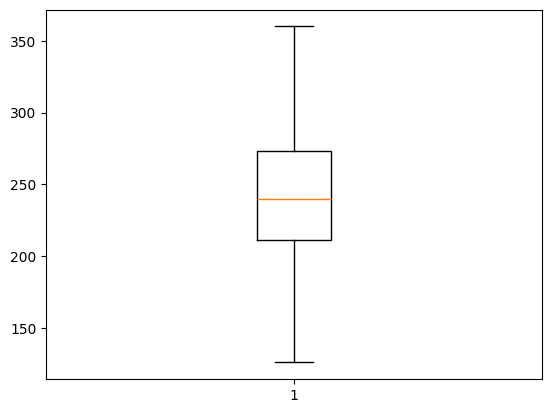

In [75]:
plt.boxplot(outliers['chol'])

In [76]:

#calculate Q1 (25th percentile) and Q3 (75th percentile)
Q9 = data['thalach'].quantile(0.25)
Q11 = data['thalach'].quantile(0.75)
#calculate the IQR
IQR3 = Q11 - Q9
#calculate lower and upper bounds for outliers
lower_bound = Q9 - 1.5 * IQR3
upper_bound = Q11 + 1.5 * IQR3
#Identify outliers
outliers = data[(data['thalach'] < lower_bound) | (data['thalach'] > upper_bound)]
outliers



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
267,67,1,0,120,237,0,1.0,71,0,1.0,1,0,2,0


In [77]:
outliers =  data[~((data['thalach'] < lower_bound) | (data['thalach'] > upper_bound))]
outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1.0,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0.0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1.0,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1.0,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1.0,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,44,0,2,108,141,0,1.0,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1.0,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0.0,125,0,0.0,2,0,2,0
873,57,1,0,140,192,0,1.0,148,0,0.4,1,0,1,1


{'whiskers': [<matplotlib.lines.Line2D at 0x1e61c4715d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e61c471cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e61c471630>],
 'medians': [<matplotlib.lines.Line2D at 0x1e61c4722c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e61c4725c0>],
 'means': []}

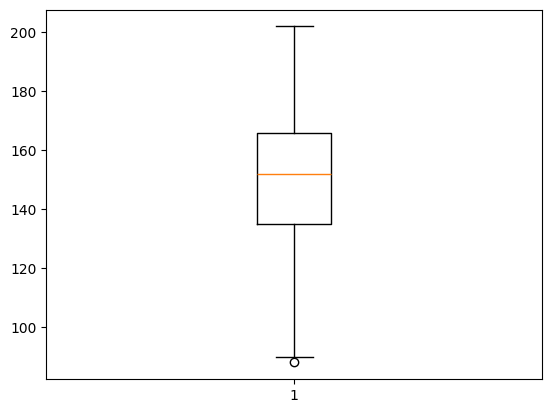

In [78]:
plt.boxplot(outliers['thalach'])

In [79]:

#calculate Q1 (25th percentile) and Q3 (75th percentile)
Q13 = data['oldpeak'].quantile(0.25)
Q15 = data['oldpeak'].quantile(0.75)
#calculate the IQR
IQR4 = Q15 - Q13
#calculate lower and upper bounds for outliers
lower_bound = Q13 - 1.5 * IQR4
upper_bound = Q15 + 1.5 * IQR4
#Identify outliers
outliers = data[(data['oldpeak'] < lower_bound) | (data['oldpeak'] > upper_bound)]
outliers



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
6,58,1,0,114,318,0,2.0,140,0,4.4,0,3,1,0
13,51,1,0,140,298,0,1.0,122,1,4.2,1,3,3,0
54,55,1,0,140,217,0,1.0,111,1,5.6,0,0,3,0
69,62,0,0,160,164,0,0.0,145,0,6.2,0,3,3,0
528,59,1,3,178,270,0,0.0,145,0,4.2,0,0,3,1


In [80]:
outliers =  data[~((data['oldpeak'] < lower_bound) | (data['oldpeak'] > upper_bound))]
outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1.0,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0.0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1.0,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1.0,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1.0,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,44,0,2,108,141,0,1.0,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1.0,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0.0,125,0,0.0,2,0,2,0
873,57,1,0,140,192,0,1.0,148,0,0.4,1,0,1,1


{'whiskers': [<matplotlib.lines.Line2D at 0x1e61c4e9660>,
 'caps': [<matplotlib.lines.Line2D at 0x1e61c4e9a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e61c4e9360>],
 'medians': [<matplotlib.lines.Line2D at 0x1e61c4ea020>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e61c4ea230>],
 'means': []}

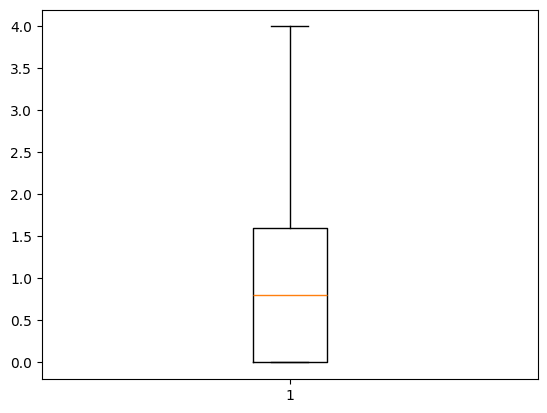

In [81]:
plt.boxplot(outliers['oldpeak'])

In [82]:

#calculate Q1 (25th percentile) and Q3 (75th percentile)
Q17 = data['ca'].quantile(0.25)
Q19 = data['ca'].quantile(0.75)
#calculate the IQR
IQR5 = Q19 - Q17
#calculate lower and upper bounds for outliers
lower_bound = Q17 - 1.5 * IQR5
upper_bound = Q19 + 1.5 * IQR5
#Identify outliers
outliers = data[(data['ca'] < lower_bound) | (data['ca'] > upper_bound)]
outliers



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,62,0,0,138,294,1,1.0,106,0,1.9,1,3,2,0
6,58,1,0,114,318,0,2.0,140,0,4.4,0,3,1,0
13,51,1,0,140,298,0,1.0,122,1,4.2,1,3,3,0
52,38,1,2,138,175,0,1.0,173,0,0.0,2,4,2,1
53,49,1,2,120,188,0,1.0,139,0,2.0,1,3,3,0
69,62,0,0,160,164,0,0.0,145,0,6.2,0,3,3,0
81,49,1,2,118,149,0,0.0,126,0,0.8,2,3,2,0
128,52,1,2,138,223,0,1.0,169,0,0.0,2,4,2,1
154,63,1,0,130,330,1,0.0,132,1,1.8,2,3,3,0
160,77,1,0,125,304,0,0.0,162,1,0.0,2,3,2,0


In [83]:
outliers =  data[~((data['ca'] < lower_bound) | (data['ca'] > upper_bound))]
outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1.0,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0.0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1.0,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1.0,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0.0,122,0,1.0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,44,0,2,108,141,0,1.0,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1.0,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0.0,125,0,0.0,2,0,2,0
873,57,1,0,140,192,0,1.0,148,0,0.4,1,0,1,1


{'whiskers': [<matplotlib.lines.Line2D at 0x1e61c54e770>,
 'caps': [<matplotlib.lines.Line2D at 0x1e61c54ed70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e61c54e4a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e61c54f2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e61c54f5e0>],
 'means': []}

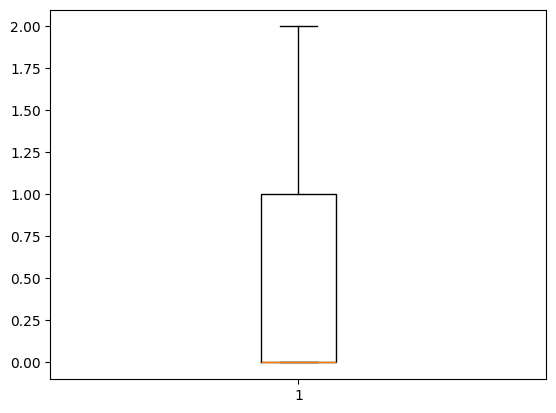

In [84]:
plt.boxplot(outliers['ca'])

In [85]:

#calculate Q1 (25th percentile) and Q3 (75th percentile)
Q21 = data['thal'].quantile(0.25)
Q23 = data['thal'].quantile(0.75)
#calculate the IQR
IQR6 = Q23 - Q21
#calculate lower and upper bounds for outliers
lower_bound = Q21 - 1.5 * IQR6
upper_bound = Q23 + 1.5 * IQR6
#Identify outliers
outliers = data[(data['thal'] < lower_bound) | (data['thal'] > upper_bound)]
outliers



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
14,52,1,0,128,204,1,1.0,156,1,1.0,1,0,0,0
319,53,0,2,128,216,0,0.0,115,0,0.0,2,0,0,1


In [86]:
outliers =  data[~((data['thal'] < lower_bound) | (data['thal'] > upper_bound))]
outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1.0,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0.0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1.0,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1.0,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1.0,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,44,0,2,108,141,0,1.0,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1.0,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0.0,125,0,0.0,2,0,2,0
873,57,1,0,140,192,0,1.0,148,0,0.4,1,0,1,1


{'whiskers': [<matplotlib.lines.Line2D at 0x1e61cbd00a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e61cbd06a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e61cba7d60>],
 'medians': [<matplotlib.lines.Line2D at 0x1e61cbd0ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e61cbd0fa0>],
 'means': []}

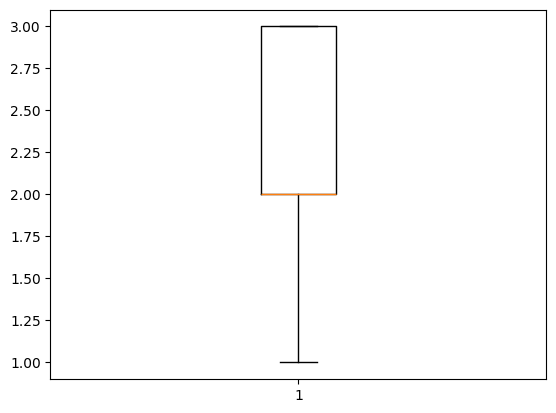

In [87]:
plt.boxplot(outliers['thal'])

In [89]:
print(data['sex'].unique())
print(data['thal'].unique())


[1 0]
[3 2 1 0]


In [90]:
print(data[(data['age'] < 0) | (data['age'] > 120)])

print(data[(data['trestbps'] < 80) | (data['trestbps'] > 200)])


Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


In [91]:
for col in data.columns:
    print(f"Unique values in {col}:")
    print(data[col].unique())
    print('------------------------')


Unique values in age:
[52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
------------------------
Unique values in sex:
[1 0]
------------------------
Unique values in cp:
[0 1 2 3]
------------------------
Unique values in trestbps:
[125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
------------------------
Unique values in chol:
[212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 